# Concevez une application au service de la santé publique
   

### Scénario 
    - Openclassrooms pour le projet 3 du parcrous Data Scientist
    - L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

## Énoncé
    Votre mission
Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) Traiter le jeu de données, en :

Réfléchissant à une idée d’application.
Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application.
Nettoyant les données en :
mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
Automatisant ces traitements pour éviter de répéter ces opérations
Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

## Idée d'application

Le nutri score se base exclusiement sur des indices caloriques, un article comme du beurre et de l'huile d'olive non néfaste à la santé en dose adaptée obtiendra un mauvais score. Nous observons ici la limite du nutri score tel qu'il a été construit. Nous souhaitons pour notre part créer un indice 'ultra transformé'pour le marché français.
Partant du constat qu'un aliment peut être plus calorique et peu transformé ou avoir le même niveau de proteine/lipide/glucide mais des conservateurs en plus grand nombres.

## Librairies

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")

## Importation des fichiers CSV

In [2]:
df_impute = pd.read_csv('P3_clean.csv')
data_fr_2 = pd.read_csv('data_fr_2.csv')

C:\Users\arthk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#df_impute.index = df_impute['Unnamed: 0']
df_impute.drop(columns='Unnamed: 0',inplace=True)
data_fr_2.drop(columns='Unnamed: 0',inplace=True)

In [4]:
df_impute.head()


,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
0,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
1,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0
2,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
3,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0
4,6.6,3.0,1.2,0.0,0.0,0.0,-3.3,0.4,1.4,0.1,0.3,2.4,157.0


In [5]:
data_fr_2.head(3)

,purchase_places,fiber_100g,carbohydrates_100g,fat_100g,image_url,image_small_url,additives,ingredients_from_palm_oil_n,additives_n,ingredients_text,...,url,creator,created_t,created_datetime,countries,last_modified_datetime,states_fr,states,states_tags,code
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,France,2016-09-17T09:18:13Z,"A compléter,Informations nutritionnelles à com...","en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...",3087
1,NaN,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,...,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,France,2015-06-17T10:11:54Z,"A compléter,Informations nutritionnelles à com...","en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...",24600
2,NaN,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,...,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,France,2016-03-17T18:17:18Z,"A compléter,Informations nutritionnelles à com...","en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...",27205


# Analyse 

# ACP

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(df_impute)
Scaled_data=scaling.transform(df_impute)
 
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(94276, 3)


Text(0, 0.5, 'pc2')

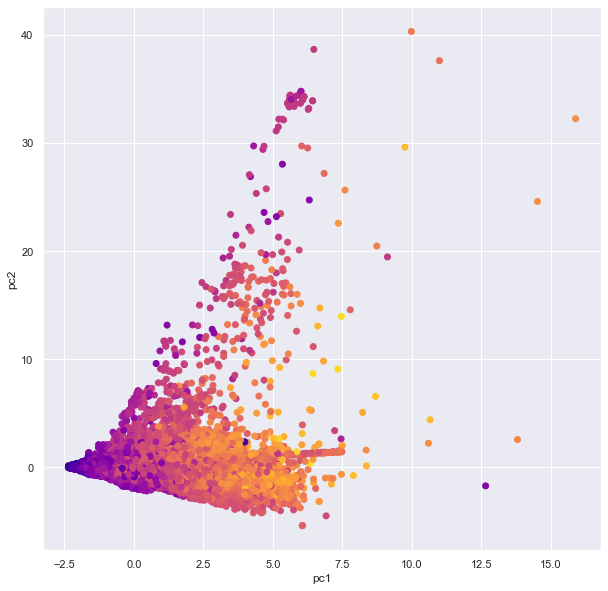

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=df_impute['nutrition-score-fr_100g'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

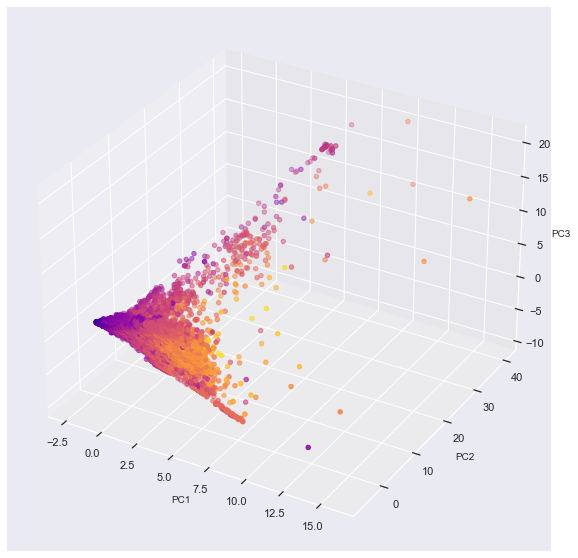

In [9]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=df_impute['nutrition-score-fr_100g'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [10]:
print(principal.explained_variance_)
print(principal.explained_variance_ratio_)

[2.88403997 2.08595367 1.68408418]
[0.22184688 0.16045627 0.12954356]


In [11]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(3)], 
        "Valeur propre" : principal.explained_variance_,
        "% variance expliquée" : np.round(principal.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(principal.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.884040,22.0,22.0
1,Dim2,2.085954,16.0,38.0
2,Dim3,1.684084,13.0,51.0


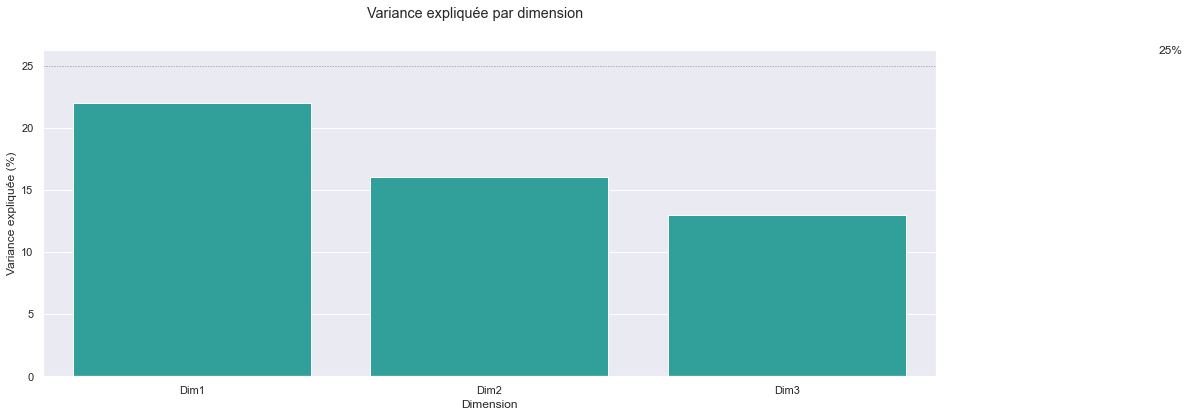

In [12]:
plt.figure(figsize=(16, 6))
g_eig = sns.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
plt.text(3.25, 26, "25%")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

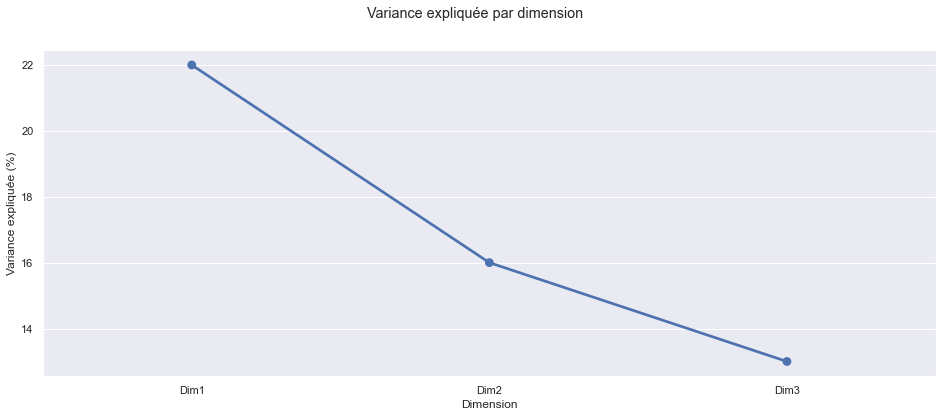

In [13]:
plt.figure(figsize=(16, 6))
g_eig = sns.pointplot(x = "Dimension", 
                          y = "% variance expliquée",
                          data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

### Visualisation du nuage de points

In [14]:
df_pca = principal.transform(df_impute)
df_pca_df = pd.DataFrame({
    "Dim1" : df_pca[:,0], 
    "Dim2" : df_pca[:,1],
    "Dim3" : df_pca[:,2]
})
df_pca_df.head()

,Dim1,Dim2,Dim3
0,51.750556,-6.942425,-33.765176
1,64.013359,-5.999155,-25.292774
2,51.750556,-6.942425,-33.765176
3,64.013359,-5.999155,-25.292774
4,8.242002,-1.150956,-2.878122


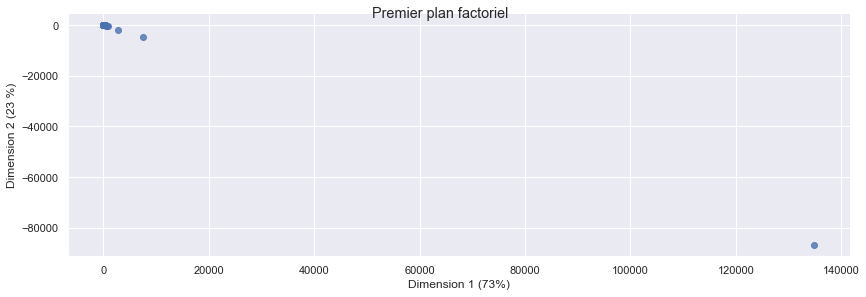

In [15]:
g_pca = sns.lmplot(x = "Dim1", y = "Dim3", data = df_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

### Représentation des variables

In [16]:
pd.DataFrame(principal.components_.T, columns=['PC'+str(i) for i in range(1, 4)], index=df_impute.columns[:13])

,PC1,PC2,PC3
fiber_100g,0.130595,-0.019740,0.077049
carbohydrates_100g,0.331455,-0.230995,0.362154
fat_100g,0.366155,0.083699,-0.467868
ingredients_from_palm_oil_n,0.253889,-0.120492,0.156026
additives_n,0.097255,-0.151849,0.312575
ingredients_that_may_be_from_palm_oil_n,0.200379,-0.136947,0.239206
nutrition-score-fr_100g,0.516679,-0.019005,-0.090517
saturated-fat_100g,0.419149,0.072245,-0.410324
sugars_100g,0.340099,-0.272189,0.290099
sodium_100g,0.122221,0.611395,0.299815


In [17]:
coordvar = principal.components_.T * np.sqrt(principal.explained_variance_)
coordvar_df = pd.DataFrame(coordvar, columns=['PC'+str(i) for i in range(1, 4)], index=df_impute.columns[:13])
coordvar_df

,PC1,PC2,PC3
fiber_100g,0.221782,-0.028510,0.099988
carbohydrates_100g,0.562892,-0.333622,0.469976
fat_100g,0.621821,0.120885,-0.607162
ingredients_from_palm_oil_n,0.431166,-0.174024,0.202478
additives_n,0.165163,-0.219312,0.405635
ingredients_that_may_be_from_palm_oil_n,0.340292,-0.197790,0.310423
nutrition-score-fr_100g,0.877448,-0.027448,-0.117466
saturated-fat_100g,0.711818,0.104342,-0.532487
sugars_100g,0.577572,-0.393118,0.376468
sodium_100g,0.207561,0.883027,0.389077


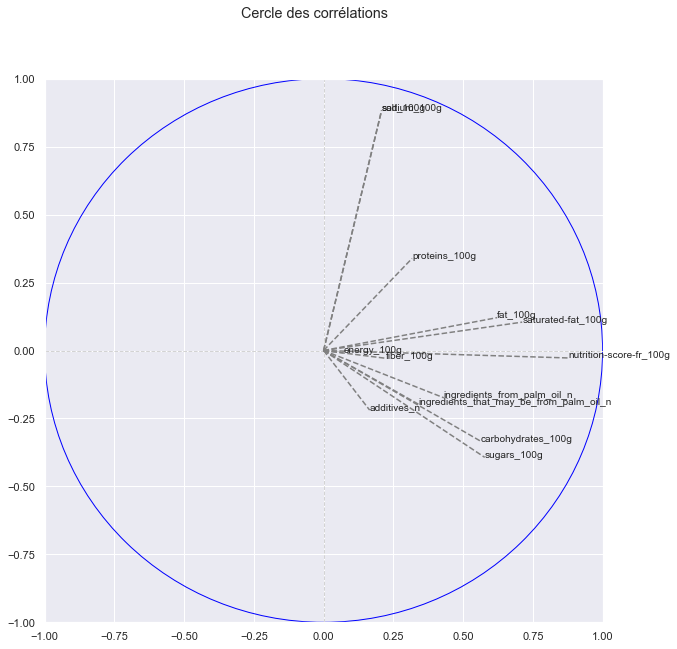

In [18]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(13):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC2"][j], coordvar_df.index[j], size = 10)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

In [19]:
df_impute

,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
0,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
1,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0
2,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
3,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0
4,6.6,3.0,1.2,0.0,0.0,0.0,-3.3,0.4,1.4,0.1,0.3,2.4,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94271,0.0,7.8,10.8,0.0,1.0,0.0,3.7,0.2,5.4,0.1,0.3,2.0,176.0
94272,0.2,0.5,0.2,0.0,0.0,0.0,2.0,0.2,0.5,0.0,0.0,0.5,21.0
94273,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
94274,1.3,34.0,8.1,0.0,0.0,0.0,11.7,3.6,19.3,0.3,0.8,4.8,1030.0


## Jointure de notre tableau imputé et des groupes d'aliments

In [20]:
data_fr_2[['pnns_groups_2','pnns_groups_1']]

,pnns_groups_2,pnns_groups_1
0,inconnu,NaN
1,unknown,unknown
2,inconnu,NaN
3,unknown,unknown
4,vegetables,Cereals and potatoes
...,...,...
94271,alcoholic beverages,NaN
94272,non-sugared beverages,Beverages
94273,inconnu,NaN
94274,processed meat,Fish Meat Eggs


In [21]:
db = data_fr_2[['pnns_groups_1','pnns_groups_2','ingredients_text']].merge(df_impute,how='outer',left_index=True, right_index=True)
db.head(5)

,pnns_groups_1,pnns_groups_2,ingredients_text,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g
0,NaN,inconnu,NaN,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
1,unknown,unknown,NaN,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0
2,NaN,inconnu,NaN,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0
3,unknown,unknown,NaN,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0
4,Cereals and potatoes,vegetables,lentilles vertes,6.6,3.0,1.2,0.0,0.0,0.0,-3.3,0.4,1.4,0.1,0.3,2.4,157.0


#### On créer une colonne *n_ingredient* : nombre d'ingrédients 

In [22]:
db['n_ingredient'] = db.ingredients_text.str.count(',')+1
db.tail()

,pnns_groups_1,pnns_groups_2,ingredients_text,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,n_ingredient
94271,NaN,alcoholic beverages,NaN,0.0,7.8,10.8,0.0,1.0,0.0,3.7,0.2,5.4,0.1,0.3,2.0,176.0,NaN
94272,Beverages,non-sugared beverages,"thé vert, arôme naturel bergamote avec autres ...",0.2,0.5,0.2,0.0,0.0,0.0,2.0,0.2,0.5,0.0,0.0,0.5,21.0,3.0
94273,NaN,inconnu,NaN,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0,NaN
94274,Fish Meat Eggs,processed meat,"viande d'oie, graisse de canard, épices, sel, ...",1.3,34.0,8.1,0.0,0.0,0.0,11.7,3.6,19.3,0.3,0.8,4.8,1030.0,5.0
94275,NaN,inconnu,NaN,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0,NaN


In [23]:
db.loc[db['n_ingredient'].isna()].head(20)

,pnns_groups_1,pnns_groups_2,ingredients_text,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,n_ingredient
0,NaN,inconnu,NaN,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0,NaN
1,unknown,unknown,NaN,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0,NaN
2,NaN,inconnu,NaN,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0,NaN
3,unknown,unknown,NaN,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0,NaN
5,unknown,unknown,NaN,0.0,28.0,10.8,0.0,3.0,0.0,0.0,4.5,0.4,1.6,4.0,12.7,1095.0,NaN
7,Sugary snacks,sweets,NaN,0.7,73.3,1.7,0.0,7.0,0.0,13.7,5.3,35.5,0.4,1.1,9.0,1418.0,NaN
10,NaN,inconnu,NaN,0.9,82.3,2.0,0.0,4.0,0.0,14.0,0.8,87.7,0.0,0.0,0.6,1753.0,NaN
11,NaN,inconnu,NaN,3.9,51.3,37.3,1.0,3.0,0.0,14.0,2.9,50.3,0.0,0.0,9.5,2406.0,NaN
12,NaN,inconnu,NaN,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0,NaN
13,NaN,inconnu,NaN,0.0,0.7,8.2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1163.0,NaN


#### Suppression des valeurs manquantes

In [24]:
db.dropna(inplace=True)
db.shape

(48984, 17)

In [25]:
db

,pnns_groups_1,pnns_groups_2,ingredients_text,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,n_ingredient
4,Cereals and potatoes,vegetables,lentilles vertes,6.6,3.0,1.2,0.0,0.0,0.0,-3.3,0.4,1.4,0.1,0.3,2.4,157.0,1.0
6,Sugary snacks,biscuits and cakes,"Sucre, farine de _Blé_, graisse et huiles végé...",3.1,33.1,32.5,0.0,3.0,1.0,12.3,7.1,24.6,0.3,0.7,6.3,1938.0,15.0
8,Beverages,non-sugared beverages,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,1.7,0.0,0.0,0.0,159.0,9.0
9,unknown,unknown,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",0.0,0.7,10.3,0.0,4.0,0.0,1.7,6.6,0.4,1.4,3.7,10.2,1095.0,39.0
15,Beverages,sweetened beverages,"Eau gazéifiée, sucre, colorant caramel E150d, ...",0.0,10.4,0.0,0.0,2.0,0.0,13.0,0.0,10.4,0.0,0.0,0.0,177.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94258,unknown,unknown,semoule de manioc,0.0,1.2,17.7,0.0,0.0,0.0,1.7,9.8,0.8,1.6,4.0,10.2,1095.0,1.0
94261,unknown,unknown,Gingembre,0.0,1.2,17.7,0.0,0.0,0.0,1.7,9.8,0.8,1.6,4.0,10.2,1095.0,1.0
94269,Sugary snacks,sweets,Miel,0.7,53.6,11.0,0.0,0.0,0.0,13.7,5.3,34.2,0.4,1.1,9.0,1418.0,1.0
94272,Beverages,non-sugared beverages,"thé vert, arôme naturel bergamote avec autres ...",0.2,0.5,0.2,0.0,0.0,0.0,2.0,0.2,0.5,0.0,0.0,0.5,21.0,3.0


#### Création d'une colonne *n_ingredient_class* : quartile du nombre d'ingrédients

In [26]:
db['n_ingredient_class'] =  pd.qcut(db['n_ingredient'], q=4,labels =[1,2,3,4] ).astype(int)
db

,pnns_groups_1,pnns_groups_2,ingredients_text,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,n_ingredient,n_ingredient_class
4,Cereals and potatoes,vegetables,lentilles vertes,6.6,3.0,1.2,0.0,0.0,0.0,-3.3,0.4,1.4,0.1,0.3,2.4,157.0,1.0,1
6,Sugary snacks,biscuits and cakes,"Sucre, farine de _Blé_, graisse et huiles végé...",3.1,33.1,32.5,0.0,3.0,1.0,12.3,7.1,24.6,0.3,0.7,6.3,1938.0,15.0,3
8,Beverages,non-sugared beverages,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,1.7,0.0,0.0,0.0,159.0,9.0,3
9,unknown,unknown,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",0.0,0.7,10.3,0.0,4.0,0.0,1.7,6.6,0.4,1.4,3.7,10.2,1095.0,39.0,4
15,Beverages,sweetened beverages,"Eau gazéifiée, sucre, colorant caramel E150d, ...",0.0,10.4,0.0,0.0,2.0,0.0,13.0,0.0,10.4,0.0,0.0,0.0,177.0,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94258,unknown,unknown,semoule de manioc,0.0,1.2,17.7,0.0,0.0,0.0,1.7,9.8,0.8,1.6,4.0,10.2,1095.0,1.0,1
94261,unknown,unknown,Gingembre,0.0,1.2,17.7,0.0,0.0,0.0,1.7,9.8,0.8,1.6,4.0,10.2,1095.0,1.0,1
94269,Sugary snacks,sweets,Miel,0.7,53.6,11.0,0.0,0.0,0.0,13.7,5.3,34.2,0.4,1.1,9.0,1418.0,1.0,1
94272,Beverages,non-sugared beverages,"thé vert, arôme naturel bergamote avec autres ...",0.2,0.5,0.2,0.0,0.0,0.0,2.0,0.2,0.5,0.0,0.0,0.5,21.0,3.0,1


#### Création d'une colonne *additives_n_class* 

In [27]:
db["additives_n"][db["additives_n"]>0].quantile(q=[0.25,0.5,0.75])

0.25    1.0
0.50    2.0
0.75    4.0
Name: additives_n, dtype: float64

In [28]:
db["additives_n_class"] = 1
db["additives_n_class"] = np.where((db["additives_n"] > 0) & (db["additives_n"] <= 2), 2, db["additives_n_class"]
                                  )
db["additives_n_class"] = np.where((db["additives_n"] > 2) & (db["additives_n"] <= 4), 3, db["additives_n_class"]
                                  )
db["additives_n_class"] = np.where((db["additives_n"] > 4), 4, db["additives_n_class"]
                                  )

#### Création d'une colonne *palm_class*

In [29]:
db['palm_class'] = np.where(db['ingredients_from_palm_oil_n'] > 0,
                            2,
                            1
                           )
db.head()

,pnns_groups_1,pnns_groups_2,ingredients_text,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,n_ingredient,n_ingredient_class,additives_n_class,palm_class
4,Cereals and potatoes,vegetables,lentilles vertes,6.6,3.0,1.2,0.0,0.0,0.0,-3.3,0.4,1.4,0.1,0.3,2.4,157.0,1.0,1,1,1
6,Sugary snacks,biscuits and cakes,"Sucre, farine de _Blé_, graisse et huiles végé...",3.1,33.1,32.5,0.0,3.0,1.0,12.3,7.1,24.6,0.3,0.7,6.3,1938.0,15.0,3,3,1
8,Beverages,non-sugared beverages,"Thé noir de Chine, zestes d'oranges 7,5 %, arô...",0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,1.7,0.0,0.0,0.0,159.0,9.0,3,1,1
9,unknown,unknown,"Sirop saveur pistache 5 cl : sirop 99,16 % (su...",0.0,0.7,10.3,0.0,4.0,0.0,1.7,6.6,0.4,1.4,3.7,10.2,1095.0,39.0,4,3,1
15,Beverages,sweetened beverages,"Eau gazéifiée, sucre, colorant caramel E150d, ...",0.0,10.4,0.0,0.0,2.0,0.0,13.0,0.0,10.4,0.0,0.0,0.0,177.0,6.0,2,2,1


### Création d'une colonne *score_final*

In [30]:
db['score_final'] = db['palm_class'] + db["additives_n_class"] + db['n_ingredient_class'] 

In [31]:
db.describe()

,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,n_ingredient,n_ingredient_class,additives_n_class,palm_class,score_final
count,48984.000000,48984.000000,48984.000000,48984.000000,48984.000000,48984.000000,48984.000000,48984.000000,48984.000000,48984.000000,48984.000000,48984.000000,4.898400e+04,48984.000000,48984.000000,48984.000000,48984.000000,48984.000000
mean,2.009630,25.870401,12.721556,0.070023,1.904561,0.152785,7.717681,5.018631,12.355688,0.469288,1.193271,7.486234,1.125991e+03,10.629655,2.430304,2.005737,1.069023,5.505063
std,3.290717,26.658660,16.120265,0.259079,2.587918,0.458171,8.657665,7.698509,17.718835,1.514992,3.714706,7.092272,1.470508e+04,10.307373,1.124709,1.059924,0.253495,2.048295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e-01,1.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,3.000000,1.200000,0.000000,0.000000,0.000000,1.000000,0.300000,1.000000,0.000000,0.100000,1.900000,4.150000e+02,3.000000,1.000000,1.000000,1.000000,4.000000
50%,1.000000,13.500000,7.000000,0.000000,1.000000,0.000000,6.000000,1.900000,3.700000,0.200000,0.600000,6.000000,1.016000e+03,8.000000,2.000000,2.000000,1.000000,5.000000
75%,2.700000,50.300000,19.000000,0.000000,3.000000,0.000000,14.000000,6.700000,16.100000,0.500000,1.300000,10.200000,1.548000e+03,15.000000,3.000000,3.000000,1.000000,7.000000
max,100.000000,100.000000,100.000000,2.000000,31.000000,5.000000,40.000000,100.000000,100.000000,83.000000,100.000000,86.000000,3.251373e+06,138.000000,4.000000,4.000000,2.000000,10.000000


## Matrice des corrélations

In [32]:
db.corr()

,fiber_100g,carbohydrates_100g,fat_100g,ingredients_from_palm_oil_n,additives_n,ingredients_that_may_be_from_palm_oil_n,nutrition-score-fr_100g,saturated-fat_100g,sugars_100g,sodium_100g,salt_100g,proteins_100g,energy_100g,n_ingredient,n_ingredient_class,additives_n_class,palm_class,score_final
fiber_100g,1.000000,0.261301,0.033421,0.046419,-0.066510,-0.003857,-0.089838,-0.016634,0.067734,-0.040766,-0.041901,0.111292,0.029485,-0.011295,-0.019315,-0.070202,0.046141,-0.041222
carbohydrates_100g,0.261301,1.000000,-0.066871,0.237617,0.150609,0.152487,0.274473,-0.025918,0.641176,-0.089322,-0.092306,-0.105644,0.029933,0.081064,0.107442,0.153344,0.238372,0.167847
fat_100g,0.033421,-0.066871,1.000000,0.124803,-0.006926,0.056472,0.569223,0.747143,0.003285,0.017540,0.016788,0.154309,0.036452,0.001222,0.023242,0.006913,0.126642,0.032013
ingredients_from_palm_oil_n,0.046419,0.237617,0.124803,1.000000,0.246343,0.169914,0.257412,0.153889,0.187389,0.009344,0.009923,-0.033521,0.011086,0.240077,0.241858,0.247219,0.992629,0.383578
additives_n,-0.066510,0.150609,-0.006926,0.246343,1.000000,0.428933,0.226335,-0.006618,0.139042,-0.000432,-0.001475,-0.058936,-0.000038,0.612477,0.562595,0.899811,0.244497,0.804799
ingredients_that_may_be_from_palm_oil_n,-0.003857,0.152487,0.056472,0.169914,0.428933,1.000000,0.143376,0.056114,0.075074,-0.014660,-0.014939,-0.048996,0.005036,0.338791,0.299611,0.393403,0.170578,0.389199
nutrition-score-fr_100g,-0.089838,0.274473,0.569223,0.257412,0.226335,0.143376,1.000000,0.599400,0.466836,0.082669,0.083271,0.119621,0.028412,0.146216,0.237528,0.278965,0.259663,0.306916
saturated-fat_100g,-0.016634,-0.025918,0.747143,0.153889,-0.006618,0.056114,0.599400,1.000000,0.073891,0.010234,0.010248,0.166969,0.028256,-0.007946,0.008821,0.008668,0.156342,0.028678
sugars_100g,0.067734,0.641176,0.003285,0.187389,0.139042,0.075074,0.466836,0.073891,1.000000,-0.099091,-0.102595,-0.237978,0.015119,0.040193,0.088866,0.170839,0.188033,0.160470
sodium_100g,-0.040766,-0.089322,0.017540,0.009344,-0.000432,-0.014660,0.082669,0.010234,-0.099091,1.000000,0.976703,0.112168,-0.000879,0.007065,0.024300,0.009900,0.009092,0.019591


## Heatmap de la matrice des corrélations

<AxesSubplot:>

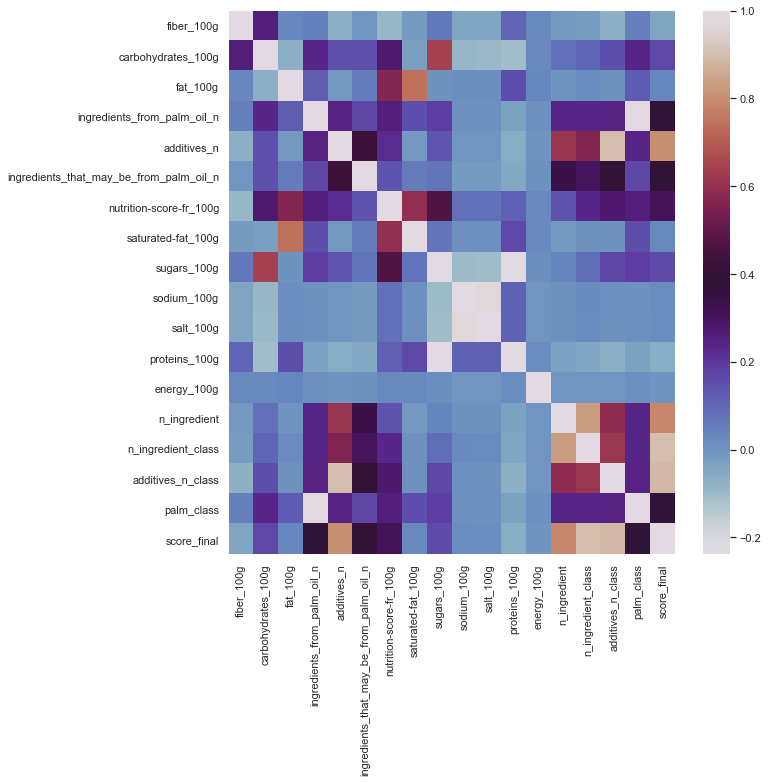

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(db.corr(),cmap = 'twilight')

## Boxplot
    Distribution du score final en fonction du nutri score fr

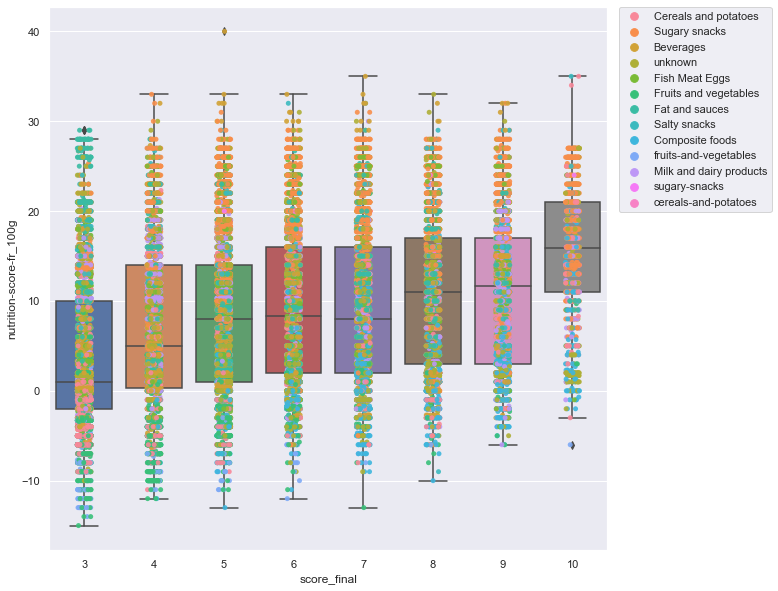

In [34]:
# boxplot with jittered data points in python
plt.figure(figsize=(10,10))
sns.boxplot(x = "score_final",
            y = "nutrition-score-fr_100g",
            data = db)
sns.stripplot(x = "score_final",
              y = "nutrition-score-fr_100g",
              hue='pnns_groups_1',
              alpha=0.9,
              data = db)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

## Boxplot
    Distribution du score final en fonction des catégories (pnns_groups_2)

<AxesSubplot:xlabel='score_final', ylabel='pnns_groups_2'>

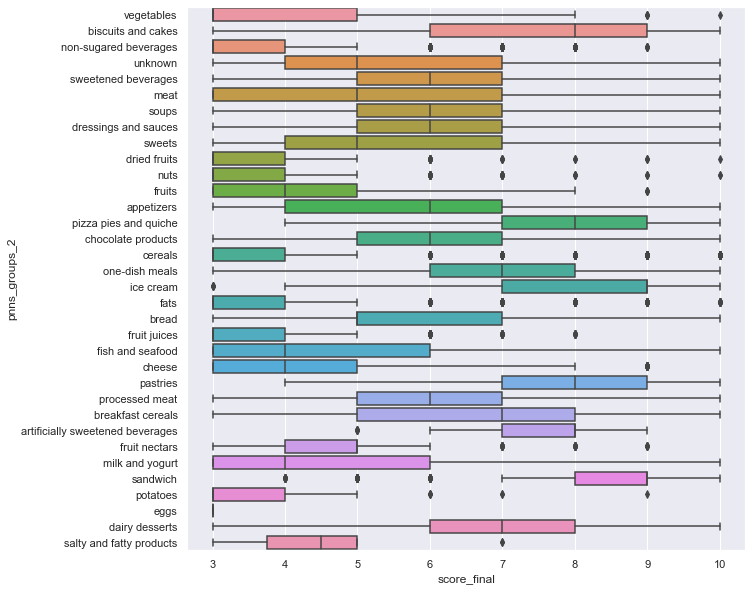

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(data=db, y="pnns_groups_2", x="score_final")

# Anova 

In [36]:
from scipy.stats import f_oneway

In [37]:
liste = [db['nutrition-score-fr_100g'][db.score_final==score]for score in db.score_final.unique()]

In [38]:
s,p = f_oneway(*liste)

In [39]:
print(s,p)

847.4117383557316 0.0


In [40]:
variable  = db.select_dtypes(include=['float64']).columns
variable

Index(['fiber_100g', 'carbohydrates_100g', 'fat_100g',
       'ingredients_from_palm_oil_n', 'additives_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition-score-fr_100g',
       'saturated-fat_100g', 'sugars_100g', 'sodium_100g', 'salt_100g',
       'proteins_100g', 'energy_100g', 'n_ingredient'],
      dtype='object')

In [41]:
for var in variable:
    liste = [db[var][db.score_final==score]for score in db.score_final.unique()]
    print('\n',var,'\n',f_oneway(*liste))


 fiber_100g 
 F_onewayResult(statistic=22.94076654165669, pvalue=2.732582132239492e-31)

 carbohydrates_100g 
 F_onewayResult(statistic=256.7465397794748, pvalue=0.0)

 fat_100g 
 F_onewayResult(statistic=29.751833846401233, pvalue=2.5146656755072693e-41)

 ingredients_from_palm_oil_n 
 F_onewayResult(statistic=3971.774156311759, pvalue=0.0)

 additives_n 
 F_onewayResult(statistic=18318.233453970093, pvalue=0.0)

 ingredients_that_may_be_from_palm_oil_n 
 F_onewayResult(statistic=1538.6275769987346, pvalue=0.0)

 nutrition-score-fr_100g 
 F_onewayResult(statistic=847.4117383557316, pvalue=0.0)

 saturated-fat_100g 
 F_onewayResult(statistic=39.60853943751817, pvalue=6.286972937556613e-56)

 sugars_100g 
 F_onewayResult(statistic=267.9765558532435, pvalue=0.0)

 sodium_100g 
 F_onewayResult(statistic=18.00659585659758, pvalue=4.5324540696945246e-24)

 salt_100g 
 F_onewayResult(statistic=19.126953832174014, pvalue=1.0524659043691944e-25)

 proteins_100g 
 F_onewayResult(statistic=42.6

> Lecture : seule la P-value de la variable *energy_100g* n'est pas significatif ; 
ce résultat est compréhensible car nous avons construit un notre *score_final* uniquement sur des variables non-caloriques (nombre d'ingrédients, d'additifs...)

# Conclusion

## Exportation CSV

In [42]:
db.to_csv('P3_cleané.csv',index=True)

In [43]:
#pd.read_csv('P3_cleané.csv')

## Depot Code

In [44]:
additifs = db[['pnns_groups_1','pnns_groups_2','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','additives_n','salt_100g']]
additifs.head()

,pnns_groups_1,pnns_groups_2,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,additives_n,salt_100g
4,Cereals and potatoes,vegetables,0.0,0.0,0.0,0.3
6,Sugary snacks,biscuits and cakes,0.0,1.0,3.0,0.7
8,Beverages,non-sugared beverages,0.0,0.0,0.0,0.0
9,unknown,unknown,0.0,0.0,4.0,3.7
15,Beverages,sweetened beverages,0.0,0.0,2.0,0.0


#### Pourcentage de produit avec zéro additif

In [45]:
print(
    'Pourcentage de produit avec zéro additif : ',
    round(
    (db.loc[db['additives_n']==0].shape[0])/(db.loc[db['additives_n']!=0].shape[0])*100
    ,2)
    ,'%'
)

Pourcentage de produit avec zéro additif :  72.33 %


In [46]:
additifs.corr()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,additives_n,salt_100g
ingredients_from_palm_oil_n,1.000000,0.169914,0.246343,0.009923
ingredients_that_may_be_from_palm_oil_n,0.169914,1.000000,0.428933,-0.014939
additives_n,0.246343,0.428933,1.000000,-0.001475
salt_100g,0.009923,-0.014939,-0.001475,1.000000


In [47]:
"""import multiprocessing
from multiprocessing import Pool

def f(x):
  return x

with Pool(processes=multiprocessing.cpu_count()) as pool:
  for i in pool.imap(f, range(10)):
    print(i)"""

'import multiprocessing\nfrom multiprocessing import Pool\n\ndef f(x):\n  return x\n\nwith Pool(processes=multiprocessing.cpu_count()) as pool:\n  for i in pool.imap(f, range(10)):\n    print(i)'

In [48]:
liste = []
for score in db.score_final.unique():
    liste.append(db['nutrition-score-fr_100g'][db.score_final==score])

In [49]:
#liste